PS:The problem statement is to develop a model that can predict the variable "y" and criteria for evaluation is that the model should generalize well on the data.

Requirements 

pip or pip3
python3

pandas-ml==0.6.1
numpy==1.19.5
scikit-learn==0.23.2

matplotlib=3.2.2
seaborn==0.10.1
shap==0.38.1

lightgbm==3.1.1
xgboost==1.3.3
catboost==0.24.4


In [1]:
import matplotlib
matplotlib.__version__

'3.2.2'

In [4]:
sns.__version__

'0.10.1'

In [3]:

import numpy as np
import pandas as pd
import string

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.preprocessing import RobustScaler,StandardScaler

In [5]:
train_df=pd.read_csv('Data_test.csv')

In [6]:
train_df.head()

,x1,x2,x3,x4,x5,y
0,26.8285141,11.376309,12.139863,-90.020767,40.604530,77.27923584
1,26.4906693,11.360129,12.132918,-89.874130,40.547834,77.23595428
2,26.7808819,11.365774,12.136567,-90.116440,40.574829,77.12844086
3,26.8153954,11.374666,12.137346,-90.145035,40.620548,77.33388519
4,26.8112583,11.361496,12.127857,-90.359573,40.687616,77.08881378


In [7]:
train_df.dtypes

x1     object
x2    float64
x3    float64
x4    float64
x5    float64
y      object
dtype: object

#### Removing Punctuations 

In [8]:

punctuation=string.punctuation.replace('.','')


In [9]:
train_df['x1'] = train_df['x1'].apply(lambda x:''.join([i for i in x if i not in punctuation]))
train_df['y'] = train_df['y'].apply(lambda x:''.join([i for i in x if i not in punctuation]))
train_df = train_df.replace(r'^\s*$', np.NaN, regex=True)

In [10]:
train_df['x1']=pd.to_numeric(train_df['x1'])
train_df['y']=train_df['y'].apply(float)

In [11]:
train_df=train_df.fillna(train_df.mean(axis=0))

In [12]:
X=train_df.iloc[:,:-1]
y=train_df.iloc[:,-1]

In [13]:
train_df.dtypes

x1    float64
x2    float64
x3    float64
x4    float64
x5    float64
y     float64
dtype: object

#### Plots for Visualizing 
<br>Linear regression of features with Target variables

In [20]:
print('Skewness',X['x1'].skew())
print('Kurtosis',X['x1'].kurtosis())

Skewness -0.18183016001355498
Kurtosis 5.373066575871814


## Rule of Thumb
<br> If the skewness is between -0.5 and 0.5, the data are fairly symmetrical.</br>
<br>If the skewness is between -1 and -0.5(negatively skewed) or between 0.5 and 1(positively skewed), </br>
<br>the data are moderately skewed.</br>
<br>If the skewness is less than -1(negatively skewed) or greater than 1(positively skewed), the data are highly skewed.</br>

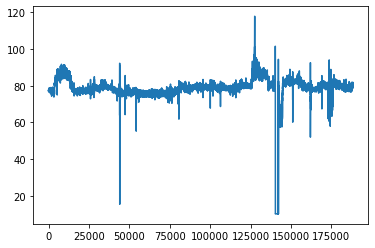

In [381]:
train_df['y'].plot()

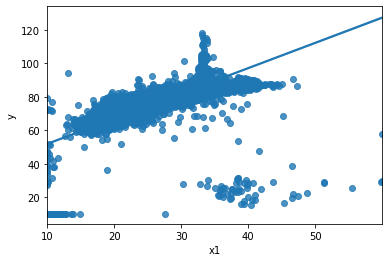

In [382]:
sns.regplot(x="x1", y="y", data=train_df);

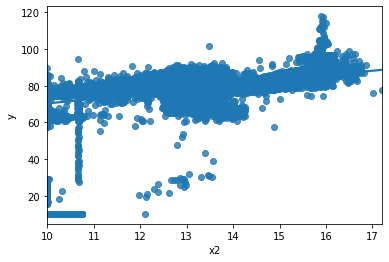

In [383]:
sns.regplot(x="x2", y="y", data=train_df);

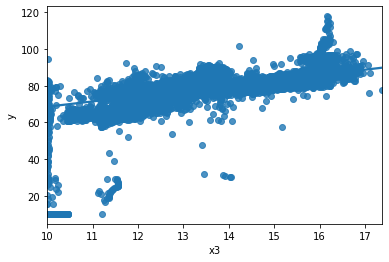

In [384]:
sns.regplot(x="x3", y="y", data=train_df);

### Identifying Outlier
lots of outliers were observed but trying to fit as it is without handling outliers just to see model prediction



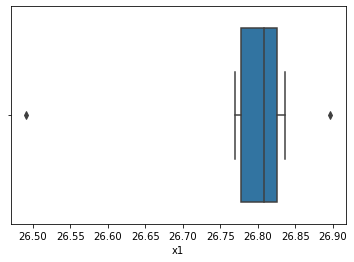

In [405]:
### as ploting all values was taking time 
sns.boxplot(x='x1', data=train_df[:10], orient='h')
# sns.boxplot(x='x2', data=train_df[:10], orient='h')

### Spliting and Training
#### Used Algorithms
<br>1) Linear regression </br>
<br>2) Decision Tree </br>
<br>3) XGboost</br>
<br>4) Lightgbm </br>
<br>5) Catboost 


In [366]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25)

In [396]:
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [431]:
# Predicted_output=pd.DataFrame()

Score 0.8745965211577386
Mean Absolute Error 1.6558431715470079
Mean Squared Error 7.517231569432129
       Actual  Predicted
0   77.451996  77.165779
1   62.044765  70.707586
2   78.915756  77.297603
3   67.472782  72.443421
4   79.339706  79.937117
5   79.073784  80.095122
6   75.285973  74.790129
7   80.878067  82.748106
8   79.696449  79.458185
9   80.192123  73.306366
10  74.011124  74.461497
11  76.264671  75.103787
12  80.519005  81.895042
13  76.024139  75.709227
14  77.094536  73.632156
15  75.721870  75.060460
16  79.125000  80.047849
17  80.704491  78.393315
18  80.091804  78.261042
19  10.195983  25.022172
AxesSubplot(0.125,0.125;0.775x0.755)


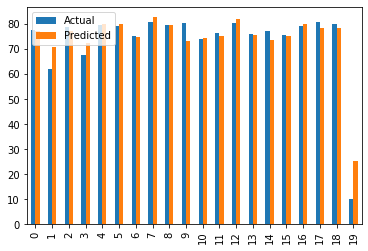

In [432]:
lin_reg=LinearRegression()
lin_reg.fit(X_train,y_train)
y_lin_pred=lin_reg.predict(X_test)
print('Score',lin_reg.score(X_test,y_test))
print('Mean Absolute Error',mean_absolute_error(y_test,y_lin_pred))
print('Mean Squared Error',mean_squared_error(y_test,y_lin_pred))
evaluate = pd.DataFrame({'Actual': y_test.values.flatten(), 'Predicted': y_lin_pred.flatten()})
print(evaluate.head(20))
Predicted_output['Linear_regression']=evaluate
print(evaluate.head(20).plot(kind = 'bar'))

#### Defing model to reduce time 

In [438]:
import time

def model_training(algo_object):
    start = time.time()
    algo_object.fit(X_train,y_train)
    y_algo_pred=algo_object.predict(X_test)
    print('Score',algo_object.score(X_test,y_test))
    print('Mean Absolute Error',mean_absolute_error(y_test,y_algo_pred))
    print('Mean Squared Error',mean_squared_error(y_test,y_algo_pred))
    evaluate = pd.DataFrame({'Actual': y_test.values.flatten(), 'Predicted': y_algo_pred.flatten()})
    print(evaluate.head(5))
#     Predicted_output[algo_object]=evaluate.tolist()
    
    print(evaluate.head(50).plot(),'\n')
    
    end = time.time()
    print('time required:\t',end-start)
#     return Predicted_output

Score 0.981248262299884
Mean Absolute Error 0.5501142649436127
Mean Squared Error 1.1240609584549892
      Actual  Predicted
0  77.451996  78.206558
1  62.044765  61.977493
2  78.915756  78.057304
3  67.472782  66.109535
4  79.339706  78.861748
AxesSubplot(0.125,0.125;0.775x0.755) 

time required:	 2.716696262359619


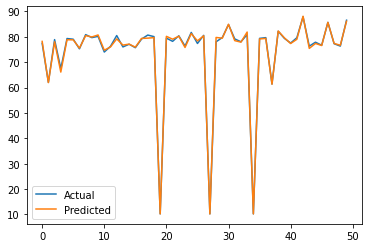

In [439]:
dec_reg=DecisionTreeRegressor()
model_training(dec_reg)

### Scaling to see results only

Score 0.9614790453133732
Mean Absolute Error 0.5968206484718399
Mean Squared Error 2.309114063886627
      Actual  Predicted
0  77.451996  77.516953
1  62.044765  62.036549
2  78.915756  78.074844
3  67.472782  66.617188
4  79.339706  79.288498
AxesSubplot(0.125,0.125;0.775x0.755) 

time required:	 2.7203633785247803


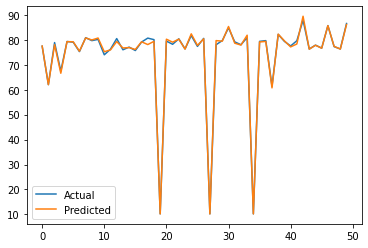

In [440]:
sc=StandardScaler()
rs=RobustScaler()
X_train_rscaled=rs.fit_transform(X_train)
X_test_rscaled=rs.fit_transform(X_test)
X_train_scaled=sc.fit_transform(X_train)
X_test_scaled=sc.fit_transform(X_test)
def model_training_scaled_data(algo_object):
    start = time.time()
    algo_object.fit(X_train_rscaled,y_train)
    y_algo_pred=algo_object.predict(X_test_rscaled)
    print('Score',algo_object.score(X_test_rscaled,y_test))
    print('Mean Absolute Error',mean_absolute_error(y_test,y_algo_pred))
    print('Mean Squared Error',mean_squared_error(y_test,y_algo_pred))
    evaluate = pd.DataFrame({'Actual': y_test.values.flatten(), 'Predicted': y_algo_pred.flatten()})
    print(evaluate.head(5))
    print(evaluate.head(50).plot(),'\n')
    end = time.time()
    print('time required:\t',end-start)
dec_reg=DecisionTreeRegressor()
model_training_scaled_data(dec_reg)

## Random forest long time for learning so skipping
 rand_forest=RandomForestRegressor()
<!-- # model_training(rand_forest) -->

Score 0.9863547223086271
Mean Absolute Error 0.5063503805001784
Mean Squared Error 0.8179574696191633
      Actual  Predicted
0  77.451996  77.014496
1  62.044765  62.128490
2  78.915756  78.767174
3  67.472782  70.878395
4  79.339706  79.064354
AxesSubplot(0.125,0.125;0.775x0.755) 

time required:	 6.707608699798584


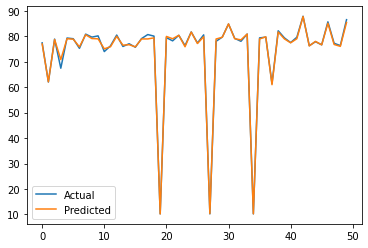

In [441]:
import xgboost
xgboost_reg=xgboost.XGBRegressor()
model_training(xgboost_reg)

Score 0.9865151282436907
Mean Absolute Error 0.5091422879185385
Mean Squared Error 0.8083420381326022
      Actual  Predicted
0  77.451996  77.138123
1  62.044765  62.665159
2  78.915756  78.790958
3  67.472782  71.129729
4  79.339706  79.178395
AxesSubplot(0.125,0.125;0.775x0.755) 

time required:	 0.39179158210754395


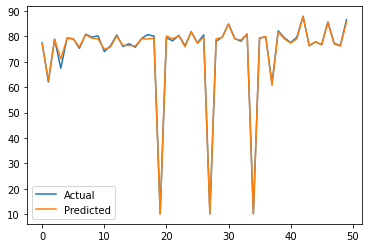

In [442]:
import lightgbm 
light_regressor=lightgbm.LGBMRegressor(learning_rate=0.3225521606157611)
model_training(light_regressor)

Learning rate set to 0.084023
0:	learn: 7.2535345	total: 8.75ms	remaining: 8.74s
100:	learn: 1.1581092	total: 671ms	remaining: 5.97s
200:	learn: 1.0923890	total: 1.26s	remaining: 5.01s
300:	learn: 1.0880175	total: 1.87s	remaining: 4.34s
400:	learn: 1.0880155	total: 2.43s	remaining: 3.63s
500:	learn: 1.0880145	total: 2.98s	remaining: 2.97s
600:	learn: 1.0880129	total: 3.6s	remaining: 2.39s
700:	learn: 1.0880123	total: 4.17s	remaining: 1.78s
800:	learn: 1.0880129	total: 4.79s	remaining: 1.19s
900:	learn: 1.0880133	total: 5.39s	remaining: 593ms
999:	learn: 1.0880138	total: 6.06s	remaining: 0us
Score 0.9807895665344443
Mean Absolute Error 0.6503223328832123
Mean Squared Error 1.1515571836041032
      Actual  Predicted
0  77.451996  76.658055
1  62.044765  62.807687
2  78.915756  79.090273
3  67.472782  72.525269
4  79.339706  79.393160
AxesSubplot(0.125,0.125;0.775x0.755) 

time required:	 6.673940181732178


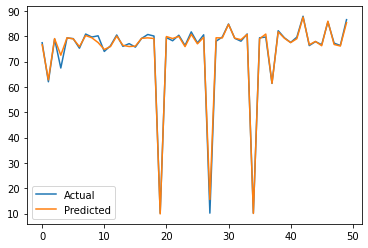

In [443]:
cboost_rs=CatBoostRegressor(task_type="GPU",devices='0:1',verbose=100)
model_training(cboost_rs)

#### Random Search cv 
parameters = {'depth'         : sp_randInt(6, 10),
              'learning_rate' : sp_randFloat(),
              'l2_leaf_reg': [1, 3, 5, 7, 9]}

cboost_rs.randomized_search(param_distributions=parameters,X=X_train,y=y_train,plot=True)
results are stored  

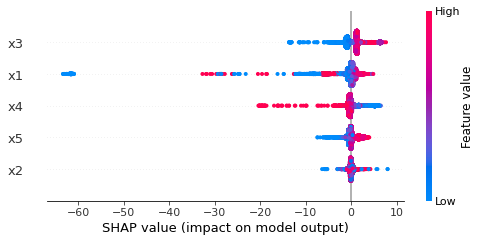

In [379]:
import shap  # package used to calculate Shap values

# Create object that can calculate shap values
explainer = shap.TreeExplainer(light_regressor)
# calculate shap values. This is what we will plot.
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

In [ ]:
import statsmodels.api as sm

from scipy.stats import uniform as sp_randFloat
from scipy.stats import randint as sp_randInt  

#### prediction Dataframe is stored as per name 
It can be further optimized to stored as per required as of it can be run and pred.csv to validated for respective models

In [763]:
def model_training_df(algo_object):
    algo_object.fit(X_train,y_train)
    y_algo_pred=algo_object.predict(X_test)
    Score=algo_object.score(X_test,y_test)
    Mean_Absolute_Error=mean_absolute_error(y_test,y_algo_pred)
    Mean_Squared_Error=mean_squared_error(y_test,y_algo_pred)
    final_df=pd.DataFrame(data={str(algo_object).strip('()'):1,'Actual': y_test.values.flatten(),'Predicted': y_algo_pred.flatten(),'Score':' ','Mean_Absolute_Error':' ','Mean_Squared_Error':' '})
    final_df.iat[0,3]=Score
    final_df.iat[0,4]=Mean_Absolute_Error
    final_df.iat[0,5]=Mean_Squared_Error
    
    return final_df

In [764]:
predicted_df=model_training_df(dec_reg)

In [765]:
predicted_df.to_csv('predicted.csv')